## Concrete Data Analysis

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np

# Librarires for Visualization

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# For data manipualtiona and model building

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
# Reading the data
con_data = pd.read_csv('Concrete_Data.csv')
con_data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  
0                          79.99  
1                          61.89  
2                          40.27  
3                          41.05  
4                          44.30

In [4]:
# checking the data types
con_data.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age_in_days                        int64
Concrete_compressive_strength    float64
dtype: object

In [5]:
# Checking for the null values
con_data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age_in_days                      0
Concrete_compressive_strength    0
dtype: int64

In [6]:
# Checking for the duplicated rows
con_data.duplicated().sum()

25

In [7]:
# Dropping the duplicated rows
con_data.drop_duplicates(inplace = True)

In [8]:
# Checking for the duplicated rows
con_data.duplicated().sum()

0

In [9]:
con_data.shape

(1005, 9)

In [10]:
con_data.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  
0                          79.99  
1                          61.89  
2                          40.27  
3                          41.05  
4                          44.30

In [11]:
con_data.describe()

Cement  Blast_Furnace_Slag      Fly_Ash        Water  \
count  1005.000000         1005.000000  1005.000000  1005.000000   
mean    278.631343           72.043483    55.536318   182.075323   
std     104.344261           86.170807    64.207969    21.339334   
min     102.000000            0.000000     0.000000   121.800000   
25%     190.700000            0.000000     0.000000   166.600000   
50%     265.000000           20.000000     0.000000   185.700000   
75%     349.000000          142.500000   118.300000   192.900000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
count       1005.000000       1005.000000     1005.000000  1005.000000   
mean           6.033234        974.376816      772.688259    45.856716   
std            5.919967         77.579667       80.340435    63.734692   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      724.300000     7.000000   
50%            6.100000        968.000000      780.000000    28.000000   
75%           10.000000       1031.000000      822.200000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete_compressive_strength  
count                    1005.000000  
mean                       35.250378  
std                        16.284815  
min                         2.330000  
25%                        23.520000  
50%                        33.800000  
75%                        44.870000  
max                        82.600000

In [56]:
fig = px.box(con_data)
fig.show()

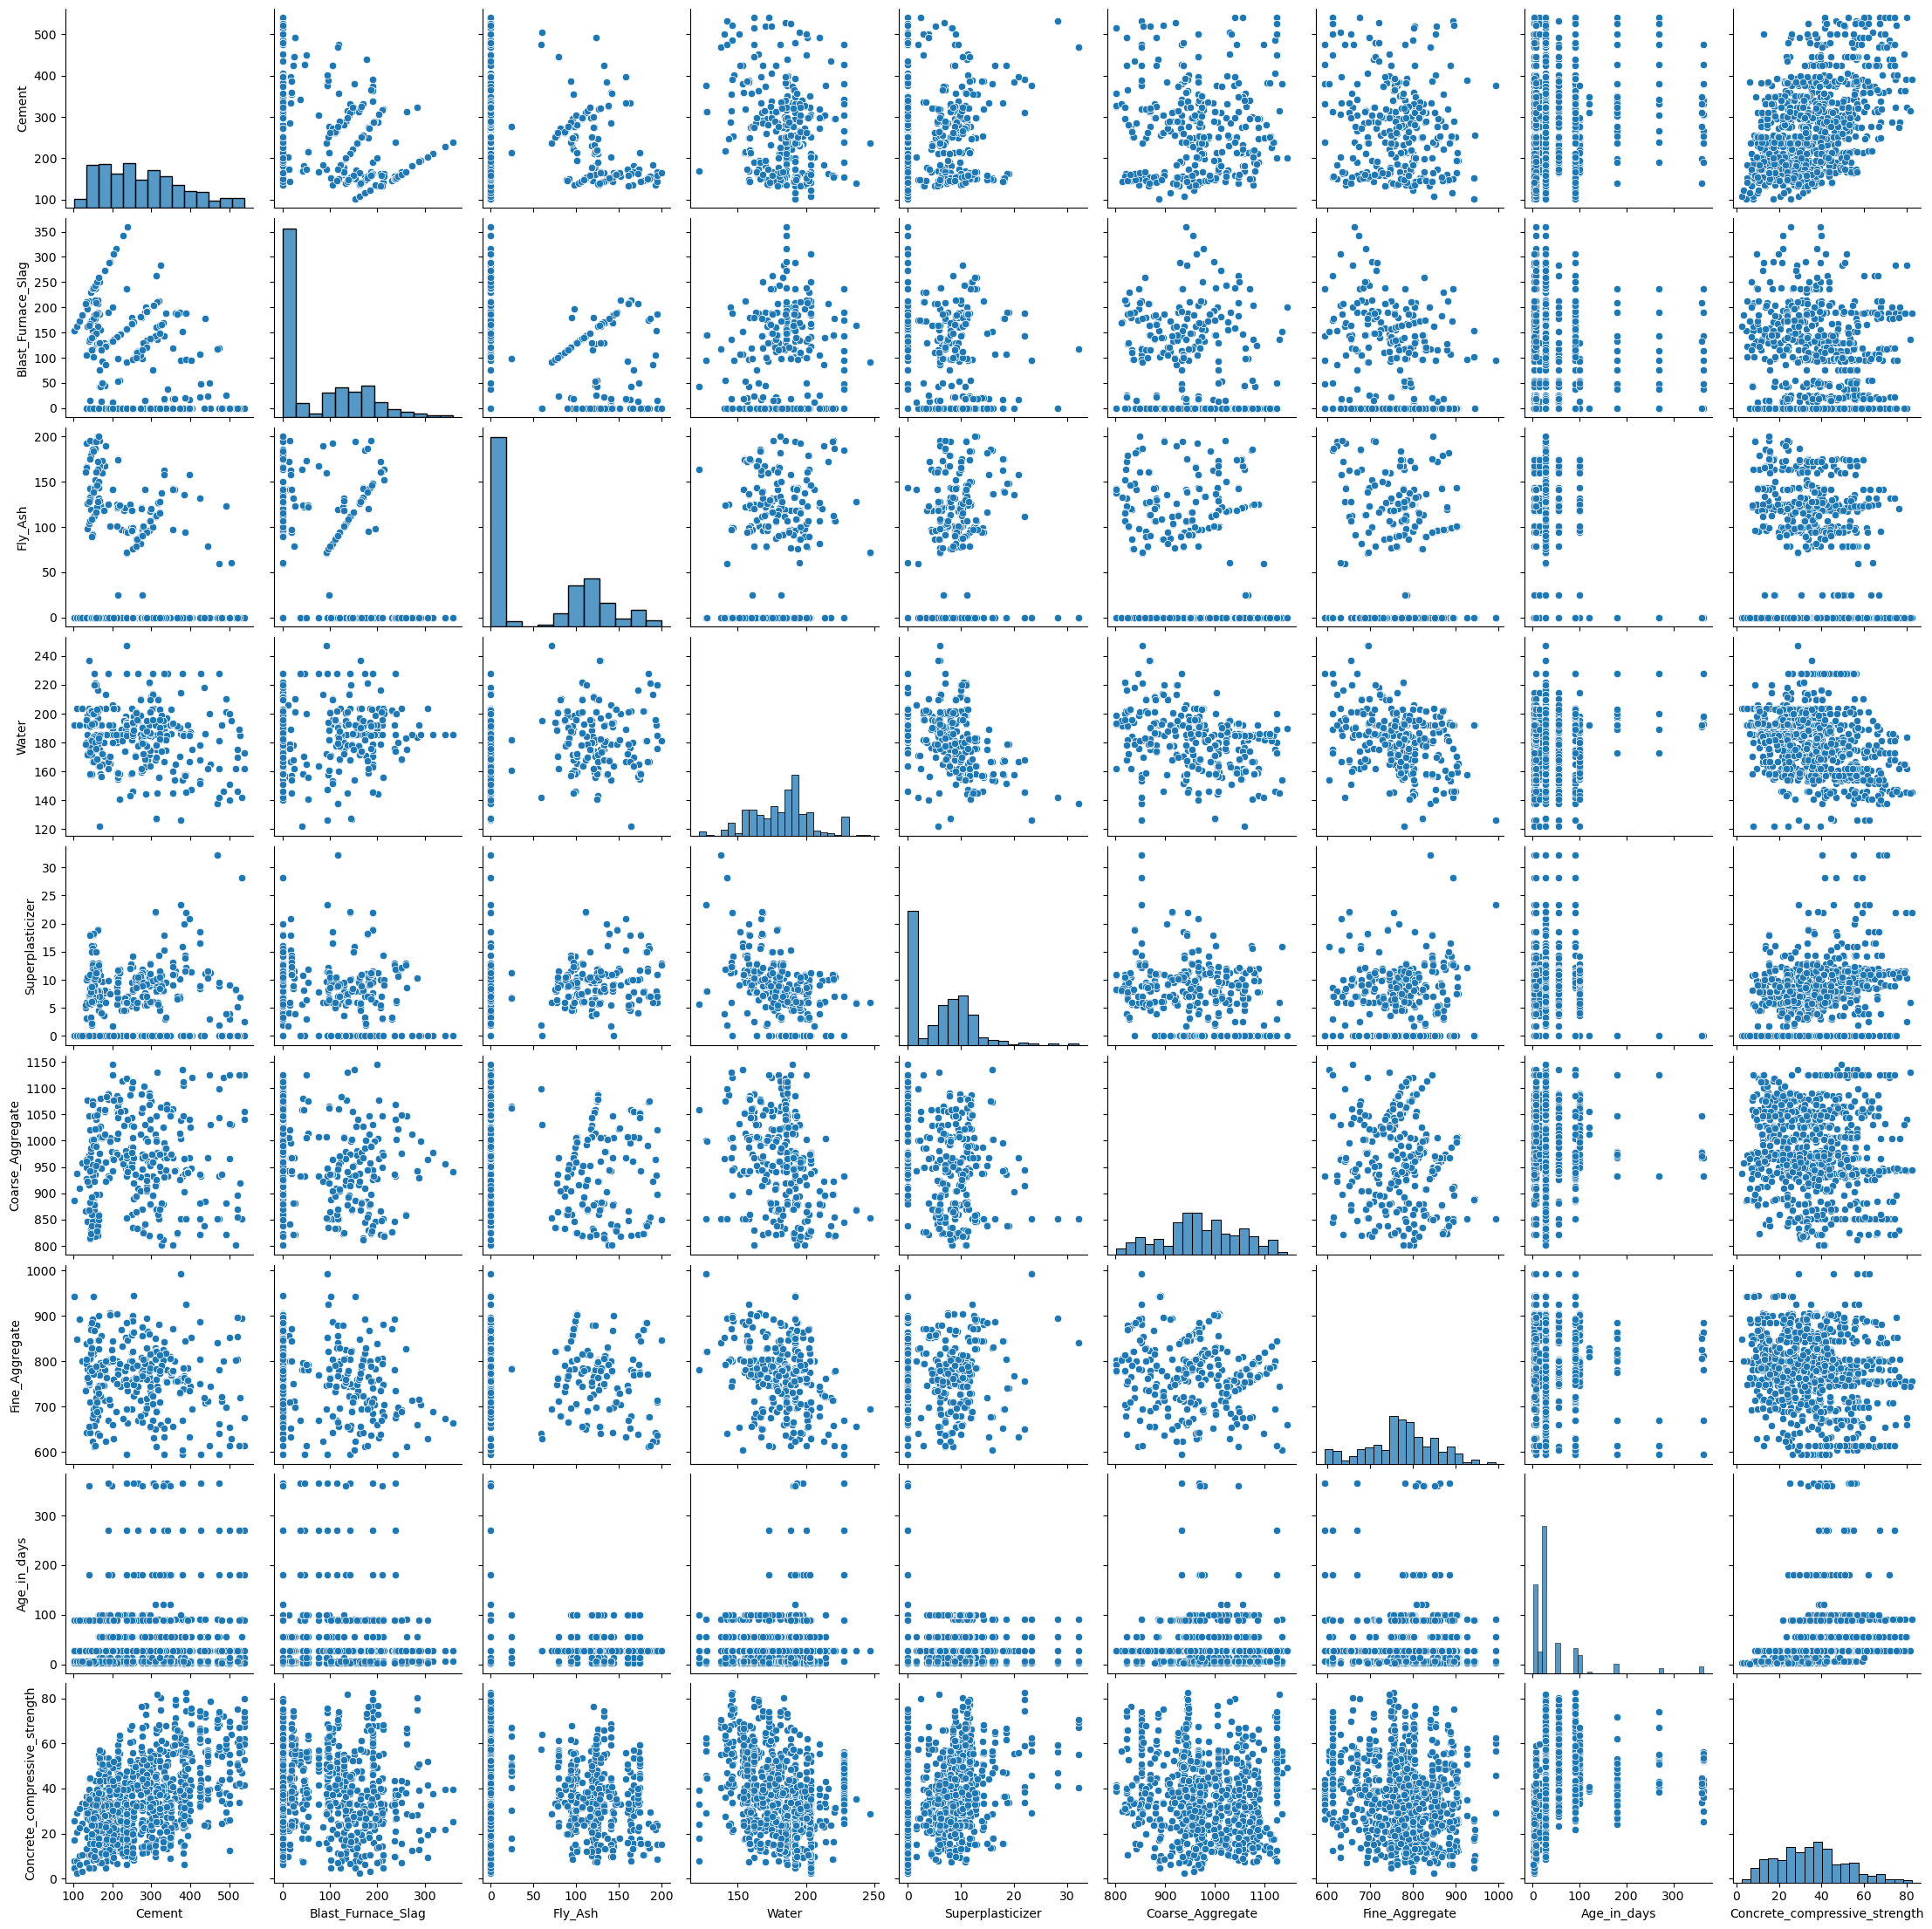

In [12]:
sns.pairplot(con_data)
plt.show()

In [13]:
con_data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_in_days',
       'Concrete_compressive_strength'],
      dtype='object')

## Model With CEMENT

In [14]:
model1 = smf.ols('Concrete_compressive_strength ~ Cement', data = con_data)
results = model1.fit()
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.238
Model:                                       OLS   Adj. R-squared:                  0.238
Method:                            Least Squares   F-statistic:                     314.0
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):           2.46e-61
Time:                                   14:41:07   Log-Likelihood:                -4092.9
No. Observations:                           1005   AIC:                             8190.
Df Residuals:                               1003   BIC:                             8200.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Model with CEMENT and Blast Furnace

In [15]:
model2 = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag', data = con_data)
results2 = model2.fit()
print(results2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.308
Model:                                       OLS   Adj. R-squared:                  0.307
Method:                            Least Squares   F-statistic:                     223.1
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):           7.42e-81
Time:                                   14:41:07   Log-Likelihood:                -4044.7
No. Observations:                           1005   AIC:                             8095.
Df Residuals:                               1002   BIC:                             8110.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Model with all the variables

In [16]:
model_all = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age_in_days', data = con_data)
results_all = model_all.fit()
print(results_all.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.604
Model:                                       OLS   Adj. R-squared:                  0.601
Method:                            Least Squares   F-statistic:                     189.8
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          2.40e-194
Time:                                   14:41:07   Log-Likelihood:                -3764.4
No. Observations:                           1005   AIC:                             7547.
Df Residuals:                                996   BIC:                             7591.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Model Removing the Coarse_aggregate

In [17]:
model_rem_coarse_agg = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Fine_Aggregate + Age_in_days', data = con_data)
results_rem_coarse_agg = model_rem_coarse_agg.fit()
print(results_rem_coarse_agg.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.603
Model:                                       OLS   Adj. R-squared:                  0.600
Method:                            Least Squares   F-statistic:                     216.1
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          6.42e-195
Time:                                   14:41:07   Log-Likelihood:                -3765.8
No. Observations:                           1005   AIC:                             7548.
Df Residuals:                                997   BIC:                             7587.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Model with removing the Fine Aggregate 

In [18]:
model_rem_fine_agg = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age_in_days', data = con_data)
results_rem_fine_agg = model_rem_fine_agg.fit()
print(results_rem_fine_agg.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.603
Model:                                       OLS   Adj. R-squared:                  0.600
Method:                            Least Squares   F-statistic:                     252.2
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          4.58e-196
Time:                                   14:41:07   Log-Likelihood:                -3766.0
No. Observations:                           1005   AIC:                             7546.
Df Residuals:                                998   BIC:                             7580.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Model with removing Superplastic

In [19]:
model_rem_super = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Age_in_days', data = con_data)
results_rem_super = model_rem_super.fit()
print(results_rem_super.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.599
Model:                                       OLS   Adj. R-squared:                  0.597
Method:                            Least Squares   F-statistic:                     298.9
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          1.46e-195
Time:                                   14:41:08   Log-Likelihood:                -3770.1
No. Observations:                           1005   AIC:                             7552.
Df Residuals:                                999   BIC:                             7582.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## For checking the VIF Value of the above independent variables

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
# Creating a empty data frame
vif = pd.DataFrame()

In [22]:
independent_variables = con_data[:].drop(['Coarse_Aggregate', 'Fine_Aggregate', 'Concrete_compressive_strength'], axis = 1)

In [23]:
collist = list(independent_variables.columns)
vif['features'] = collist
vif

features
0              Cement
1  Blast_Furnace_Slag
2             Fly_Ash
3               Water
4    Superplasticizer
5         Age_in_days

In [24]:
vif['VIF'] = [variance_inflation_factor(independent_variables, i ) for i in range(independent_variables.shape[1])]

In [25]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

features    VIF
3               Water  21.01
0              Cement  13.86
2             Fly_Ash   3.92
4    Superplasticizer   3.71
1  Blast_Furnace_Slag   2.95
5         Age_in_days   1.65

## According to this we will check what happens after removing the water

## Model with removing the water

In [26]:
model_rem_water = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Superplasticizer + Age_in_days', data = con_data)
results_rem_water = model_rem_water.fit()
print(results_rem_water.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.562
Model:                                       OLS   Adj. R-squared:                  0.560
Method:                            Least Squares   F-statistic:                     256.1
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          3.97e-176
Time:                                   14:41:08   Log-Likelihood:                -3815.2
No. Observations:                           1005   AIC:                             7642.
Df Residuals:                                999   BIC:                             7672.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## VIF without Water

In [27]:
vif = pd.DataFrame()

In [28]:
independent_variables = con_data[:].drop(['Coarse_Aggregate', 'Fine_Aggregate', 'Concrete_compressive_strength', 'Water'], axis = 1)

In [29]:
collist = list(independent_variables.columns)
vif['features'] = collist
vif

features
0              Cement
1  Blast_Furnace_Slag
2             Fly_Ash
3    Superplasticizer
4         Age_in_days

In [30]:
vif['VIF'] = [variance_inflation_factor(independent_variables, i ) for i in range(independent_variables.shape[1])]

In [31]:
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

features   VIF
3    Superplasticizer  2.90
0              Cement  2.72
2             Fly_Ash  1.97
4         Age_in_days  1.55
1  Blast_Furnace_Slag  1.47

## Using the log of the data and finding out the results

In [33]:
con_data_copy = con_data.copy()

In [34]:
con_data_copy.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  
0                          79.99  
1                          61.89  
2                          40.27  
3                          41.05  
4                          44.30

In [35]:
# Log transform data
con_data_copy['ccs_log_data'] = np.log(con_data_copy['Concrete_compressive_strength'])

In [36]:
con_data_copy.head()

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse_Aggregate  Fine_Aggregate  Age_in_days  \
0            1040.0           676.0           28   
1            1055.0           676.0           28   
2             932.0           594.0          270   
3             932.0           594.0          365   
4             978.4           825.5          360   

   Concrete_compressive_strength  ccs_log_data  
0                          79.99      4.381902  
1                          61.89      4.125359  
2                          40.27      3.695607  
3                          41.05      3.714791  
4                          44.30      3.790985

In [38]:
#con_data_copy = con_data_copy.drop(['log_data'], axis = 1)

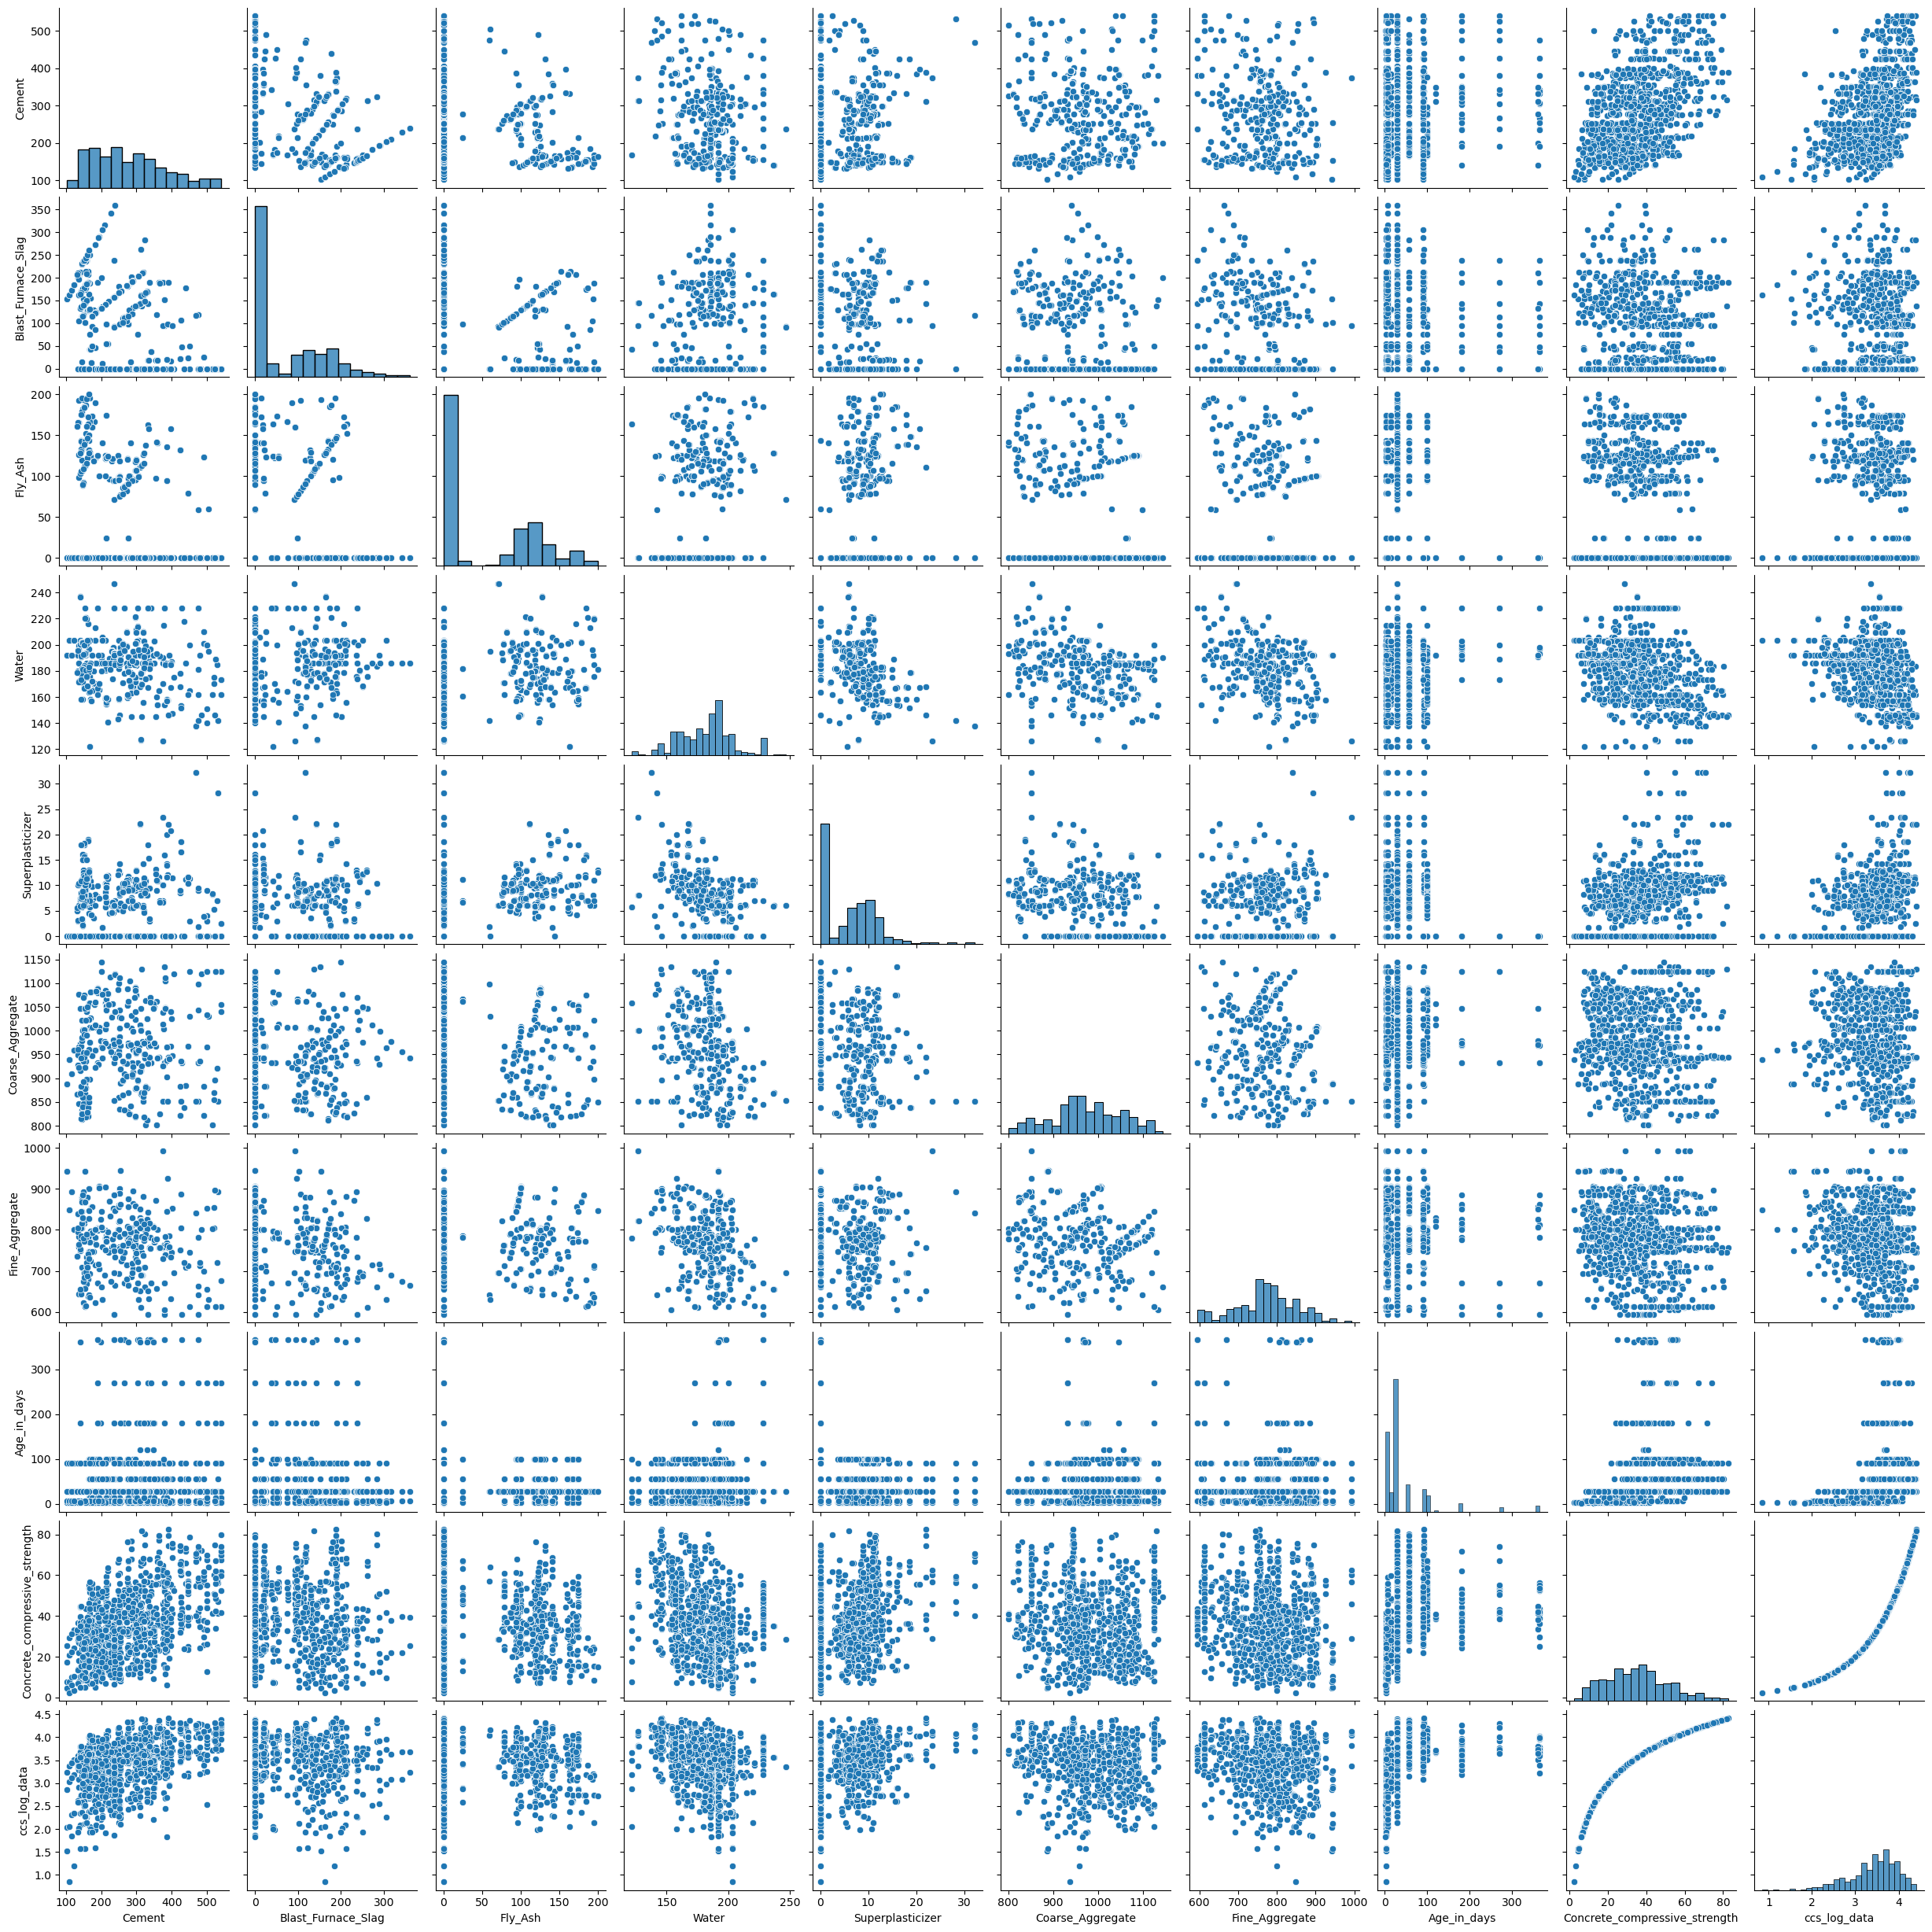

In [39]:
sns.pairplot(con_data_copy)
plt.show()

## Using the OLS method to find out the regression of the overall model

In [40]:
model_all = smf.ols('ccs_log_data ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age_in_days', data = con_data_copy)
results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:           ccs_log_data   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     148.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          6.09e-164
Time:                        14:42:29   Log-Likelihood:                -426.23
No. Observations:                1005   AIC:                             870.5
Df Residuals:                     996   BIC:                             914.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.7804      0

## Removing the course_agg and the fine _agg of the log data

In [41]:
model_all = smf.ols('ccs_log_data ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age_in_days', data = con_data_copy)
results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:           ccs_log_data   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.13e-166
Time:                        14:42:31   Log-Likelihood:                -427.22
No. Observations:                1005   AIC:                             868.4
Df Residuals:                     998   BIC:                             902.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9391      0

## Checking for the vif values of the the log transformed data

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# Creating a empty data frame
vif1 = pd.DataFrame()

In [44]:
independent_variables = con_data_copy[:].drop(['Coarse_Aggregate', 'Fine_Aggregate', 'Concrete_compressive_strength', 'ccs_log_data'], axis = 1)

In [45]:
collist = list(independent_variables.columns)
vif1['features'] = collist
vif1

features
0              Cement
1  Blast_Furnace_Slag
2             Fly_Ash
3               Water
4    Superplasticizer
5         Age_in_days

In [46]:
vif1['VIF'] = [variance_inflation_factor(independent_variables, i ) for i in range(independent_variables.shape[1])]

In [47]:
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

features    VIF
3               Water  21.01
0              Cement  13.86
2             Fly_Ash   3.92
4    Superplasticizer   3.71
1  Blast_Furnace_Slag   2.95
5         Age_in_days   1.65

## removing the water from the log transformed data

In [57]:
model_rem_water = smf.ols('Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Superplasticizer + Age_in_days', data = con_data_copy)
results_rem_water = model_rem_water.fit()
print(results_rem_water.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete_compressive_strength   R-squared:                       0.562
Model:                                       OLS   Adj. R-squared:                  0.560
Method:                            Least Squares   F-statistic:                     256.1
Date:                           Tue, 04 Apr 2023   Prob (F-statistic):          3.97e-176
Time:                                   14:53:40   Log-Likelihood:                -3815.2
No. Observations:                           1005   AIC:                             7642.
Df Residuals:                                999   BIC:                             7672.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## VIF without water

In [50]:
# Creating a empty data frame
vif1 = pd.DataFrame()
independent_variables = con_data_copy[:].drop(['Coarse_Aggregate', 'Fine_Aggregate', 'Concrete_compressive_strength', 'ccs_log_data', 'Water'], axis = 1)
collist = list(independent_variables.columns)
vif1['features'] = collist
vif1

features
0              Cement
1  Blast_Furnace_Slag
2             Fly_Ash
3    Superplasticizer
4         Age_in_days

In [51]:
vif1['VIF'] = [variance_inflation_factor(independent_variables, i ) for i in range(independent_variables.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = 'VIF', ascending = False)
vif1

features   VIF
3    Superplasticizer  2.90
0              Cement  2.72
2             Fly_Ash  1.97
4         Age_in_days  1.55
1  Blast_Furnace_Slag  1.47